In [2]:
%matplotlib inline 
import geopandas

In [3]:
import fiona
import numpy
from shapely.geometry import Point, LineString, Polygon
from convertbng.util import convert_bng, convert_lonlat

In [4]:
railways = geopandas.GeoDataFrame.from_file('./data/osm_railway.shp')

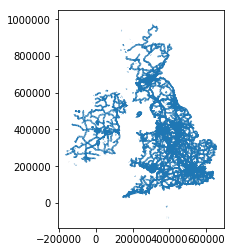

In [9]:
railways.plot()

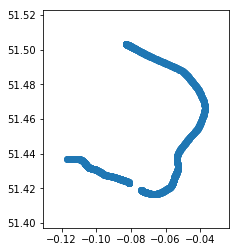

In [5]:
route_file_path = './data/track_2018-03-14_134847.gpx'
train_route = geopandas.read_file(route_file_path, layer='track_points')
train_route.plot()

In [6]:
def create_bounding_polygon(bbox):
    
    p1 = Point(bbox[0], bbox[3])
    p2 = Point(bbox[2], bbox[3])
    p3 = Point(bbox[2], bbox[1])
    p4 = Point(bbox[0], bbox[1])

    np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
    np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
    np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
    np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

    return Polygon([np1, np2, np3, np4])

In [ ]:
list(railways.geometry[0].coords)
railways.size

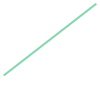

In [8]:
def convert_linestring(linestring):
    [eastings, northings] = list(numpy.array(linestring.coords).transpose())
    return LineString(numpy.array(convert_lonlat(eastings, northings)).transpose())
    
type(railways.geometry[0])
convert_linestring(railways.geometry[0])

In [ ]:
lat_lng_railways = railways.geometry.apply(convert_linestring)
# lambda line: convert_linestring(line))
lat_lng_railways.head()

In [ ]:
bounding_polygon = create_bounding_polygon(train_route.total_bounds)
lat_lng_intersections = lat_lng_railways.geometry.intersects(bounding_polygon)
lat_lng_intersections.sum()
# train_route[train_route.geometry.crosses(bounding_dataframe)]

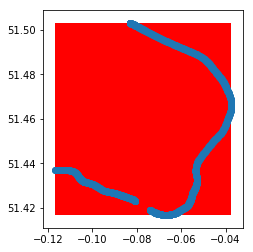

In [84]:
axis = bounding_dataframe.plot(color='red')
train_route.plot(ax=axis)